# Phân tích Marathon

Dataset: https://www.kaggle.com/datasets/aiaiaidavid/the-big-dataset-of-ultra-marathon-running/discussion/420633

Về dataset: file csv nặng tới hơn 800MB, vì vậy khi ta lọc để xử lý dữ liệu ta sẽ chia nhỏ dần theo từng lần lọc để tránh trường hợp gặp lỗi: `The kernel appears to have died. It will restart automatically.`


In [8]:
import pandas as pd
import numpy as np
import seaborn as sns

In [9]:
df = pd.read_csv("TWO_CENTURIES_OF_UM_RACES.csv")

/var/folders/63/ptp0pxpd2l9gff9vvxyg0fb00000gn/T/ipykernel_20658/2350612576.py:1: DtypeWarning: Columns (11) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("TWO_CENTURIES_OF_UM_RACES.csv")


In [4]:
df.sample(10)

,Year of event,Event dates,Event name,Event distance/length,Event number of finishers,Athlete performance,Athlete club,Athlete country,Athlete year of birth,Athlete gender,Athlete age category,Athlete average speed,Athlete ID
7048070,1985,03.11.1985,Schipholloop (NED),61km,72,5:08:12 h,AVA 70,NED,1937.0,M,M45,11875.0,1548549
4975278,2010,20.11.2010,JFK 50 Mile (USA),50mi,1014,8:24:23 h,"*Middletown, MD",USA,1969.0,M,M40,9.572,1298080
102742,2018,28.04.2018,Endurance Challenge - Washington D.C. Trail 50...,50km,331,5:13:51 h,"*Washington, DC",USA,1983.0,M,M23,9.559,84137
1803386,2017,22.10.2017,Festival des Templiers - La Grande Course (FRA),76km,1996,15:33:09 h,*Avrille,FRA,1982.0,F,W35,4.887,198998
2848517,2021,01.05.2021,Ultra Race of Champions (UROC) 50K (USA),50km,98,5:26:36 h,"*Davidson, NC",USA,1977.0,M,M40,9.186,360853
357257,2018,14.07.2018,Mt. Hood 50 Mile Trail Run (USA),50mi,135,11:11:04 h,"*Lake Oswego, OR",USA,1971.0,M,M45,7.195,237466
4798415,2009,05.-06.09.2009,Gangjin Ultra Marathon (KOR),100km,121,15:09:00 h,NaN,KOR,NaN,M,NaN,6.601,1259798
5289247,2012,07.01.2012,Harbison 50K (USA),50km,154,6:51:31 h,"*Belmont, NC",USA,1971.0,M,M40,7.29,485816
5113331,2011,23.07.2011,Course Du Petit Vignemale 45 km (FRA),45km,434,6:17:29 h,NaN,FRA,1973.0,M,M35,7.153,1265987
1042608,2016,09.10.2016,Echigo Kubikino 100km Ultramarathon (JPN),100km,1342,12:51:12 h,*Kanagawa Pref.,JPN,1943.0,M,M70,7.78,497391


In [10]:
df.dtypes

Year of event                  int64
Event dates                   object
Event name                    object
Event distance/length         object
Event number of finishers      int64
Athlete performance           object
Athlete club                  object
Athlete country               object
Athlete year of birth        float64
Athlete gender                object
Athlete age category          object
Athlete average speed         object
Athlete ID                     int64
dtype: object

In [12]:
df.shape

(7461195, 13)

### 2. Clean Data

I want to take out data which are 50km or 50mi; in USA and in 2020

In [11]:
#50km or 50 mi and in 2020
df2 = df[df["Event distance/length"].isin(['50km','50mi']) & (df["Year of event"] == 2020)]

In [12]:
#in USA
df[df["Event name"].str.contains('USA')]

,Year of event,Event dates,Event name,Event distance/length,Event number of finishers,Athlete performance,Athlete club,Athlete country,Athlete year of birth,Athlete gender,Athlete age category,Athlete average speed,Athlete ID
55,2018,06.01.2018,Yankee Springs 50 Mile Winter Challenge (USA),50mi,9,9:53:05 h,"*Middleville, MI",USA,1983.0,M,M23,8.141,55
56,2018,06.01.2018,Yankee Springs 50 Mile Winter Challenge (USA),50mi,9,11:09:35 h,"*Waterloo, ON",CAN,1977.0,F,W40,7.211,56
57,2018,06.01.2018,Yankee Springs 50 Mile Winter Challenge (USA),50mi,9,11:33:00 h,"*Kitchener, ON",CAN,1976.0,M,M40,6.967,57
58,2018,06.01.2018,Yankee Springs 50 Mile Winter Challenge (USA),50mi,9,11:38:17 h,"*Utica, MI",USA,1986.0,M,M23,6.914,58
59,2018,06.01.2018,Yankee Springs 50 Mile Winter Challenge (USA),50mi,9,11:56:35 h,"*Grass Lake, MI",USA,1988.0,M,M23,6.738,59
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7461181,1995,07.01.1995,Avalon Benefit 50-Mile Run (USA),50mi,92,11:59:37 h,NaN,USA,1941.0,M,M50,6709.0,1045603
7461182,1995,07.01.1995,Avalon Benefit 50-Mile Run (USA),50mi,92,12:01:41 h,NaN,USA,1932.0,M,M60,6690.0,1070463
7461183,1995,07.01.1995,Avalon Benefit 50-Mile Run (USA),50mi,92,12:03:26 h,NaN,USA,1934.0,F,W60,6674.0,416139
7461184,1995,07.01.1995,Avalon Benefit 50-Mile Run (USA),50mi,92,12:03:26 h,NaN,USA,1951.0,F,W40,6674.0,1098098


In [13]:
df3 = df2[df2["Event name"].str.contains('USA')]

In [15]:
df3

,Year of event,Event dates,Event name,Event distance/length,Event number of finishers,Athlete performance,Athlete club,Athlete country,Athlete year of birth,Athlete gender,Athlete age category,Athlete average speed,Athlete ID
2539945,2020,02.02.2020,West Seattle Beach Run - Winter Edition (USA),50km,20,3:17:55 h,"*Normandy Park, WA",USA,1991.0,M,M23,15.158,71287
2539946,2020,02.02.2020,West Seattle Beach Run - Winter Edition (USA),50km,20,4:02:32 h,"*Gold Bar, WA",USA,1981.0,M,M35,12.369,629508
2539947,2020,02.02.2020,West Seattle Beach Run - Winter Edition (USA),50km,20,4:07:57 h,"*Vashon, WA",USA,1999.0,M,MU23,12.099,64838
2539948,2020,02.02.2020,West Seattle Beach Run - Winter Edition (USA),50km,20,4:22:02 h,"*Gig Harbor, WA",USA,1983.0,M,M35,11.449,704450
2539949,2020,02.02.2020,West Seattle Beach Run - Winter Edition (USA),50km,20,4:27:34 h,"*Bainbridge Island, WA",USA,1977.0,M,M40,11.212,810281
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2760957,2020,03.10.2020,Yankee Springs Fall Trail Run Festival (USA),50km,30,7:07:48 h,"*East Lansing, MI",USA,1958.0,F,W60,7.013,816361
2760958,2020,03.10.2020,Yankee Springs Fall Trail Run Festival (USA),50km,30,7:27:22 h,"*Traverse City, MI",USA,1977.0,F,W40,6.706,326469
2760959,2020,03.10.2020,Yankee Springs Fall Trail Run Festival (USA),50km,30,7:27:24 h,"*Traverse City, MI",USA,1962.0,F,W55,6.705,372174
2760960,2020,03.10.2020,Yankee Springs Fall Trail Run Festival (USA),50km,30,7:38:30 h,"*Mason, MI",USA,1981.0,F,W35,6.543,860349


In [18]:
df3.shape

(26524, 13)

In [24]:
df3.sample(10)

,Year of event,Event dates,Event name,Event distance/length,Event number of finishers,Athlete performance,Athlete club,Athlete country,Athlete year of birth,Athlete gender,Athlete age category,Athlete average speed,Athlete ID
2720603,2020,14.11.2020,Stone Mill 50 Mile Run (USA),50mi,167,10:18:06 h,"*Ellicott City, MD",USA,1984.0,M,M35,7.811,50998
2698697,2020,19.12.2020,Huff 50K Trail Run (USA),50km,164,5:53:10 h,"*Royal Oak, MI",USA,1979.0,F,W40,8.495,368479
2712848,2020,21.11.2020,Dead Horse 50 km Race (USA),50km,253,6:23:46 h,"*Provo, UT",USA,1985.0,M,M23,7.817,117852
2649767,2020,19.09.2020,O'Brien 50 km Race (USA),50km,27,4:56:06 h,"*Wyoming, MN",USA,1963.0,M,M55,10.132,222399
2712867,2020,21.11.2020,Dead Horse 50 km Race (USA),50km,253,6:39:24 h,"*Woodland Hills, CA",USA,1977.0,M,M40,7.511,733895
2567461,2020,04.01.2020,Yankee Springs 50 km Winter Challenge (USA),50km,71,3:52:01 h,"*Traverse City, MI",USA,1998.0,M,MU23,12.93,279705
2628612,2020,08.02.2020,Algonquin 50km Trail Race (USA),50km,236,7:15:31 h,"*Hainesport, NJ",USA,1976.0,M,M40,6.888,46891
2731871,2020,31.10.2020,Schuylkill River 50k (USA),50km,40,7:07:08 h,NaN,USA,1969.0,F,W50,7.024,854005
2740469,2020,24.-26.10.2020,Kansas Rails-to-Trails Fall Extravaganza 50 km...,50km,104,7:37:52 h,"*Tuttle, OK",USA,1984.0,F,W35,6.552,855737
2651057,2020,19.09.2020,Grayson Highlands 50km Race (USA),50km,110,8:32:35 h,"*Hudson, OH",USA,1973.0,F,W45,5.853,348491


In [25]:
#save to csv 
df3.to_csv("Ultra_marathon_filter", index = False)

In [33]:
#remove (USA) from event name
def remove(name):
    return name[:-5]
df3["Event name"] = df3["Event name"].apply(remove)

/var/folders/63/ptp0pxpd2l9gff9vvxyg0fb00000gn/T/ipykernel_20658/2639880983.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3["Event name"] = df3["Event name"].apply(remove)


In [35]:
df3.sample(5)

,Year of event,Event dates,Event name,Event distance/length,Event number of finishers,Athlete performance,Athlete club,Athlete country,Athlete year of birth,Athlete gender,Athlete age category,Athlete average speed,Athlete ID
2754885,2020,10.10.2020,Pilot Mountain to Hanging Rock 50K Ultra,50km,159,9:18:34 h,"*New Bern, NC",USA,1974.0,M,M45,5.371,333002
2752023,2020,11.10.2020,Tussey Mountainback 50 Miler,50mi,58,11:20:30 h,"*Hummelstown, PA",USA,1953.0,M,M65,7.095,858381
2551310,2020,19.01.2020,Waterfall 50km,50km,54,8:42:40 h,*VA,USA,1950.0,M,M65,5.74,469
2716252,2020,14.11.2020,Upchuck 50K Trail Running Race,50km,74,5:36:49 h,"*Chattanooga, TN",USA,1980.0,M,M35,8.907,366105
2599551,2020,07.03.2020,Mesquite Canyon 50 km,50km,83,6:12:45 h,"*Phoenix, AZ",USA,1974.0,M,M45,8.048,304729


In [36]:
#Adding athlete age  
df3["Athlete age"] = df3["Year of event"] - df3["Athlete year of birth"]

/var/folders/63/ptp0pxpd2l9gff9vvxyg0fb00000gn/T/ipykernel_20658/3351729458.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3["Athlete age"] = df3["Year of event"] - df3["Athlete year of birth"]


In [40]:
#remove h from Athlete performance
df3["Athlete performance"] = df3["Athlete performance"].str.split().str.get(0)

/var/folders/63/ptp0pxpd2l9gff9vvxyg0fb00000gn/T/ipykernel_20658/2442947687.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3["Athlete performance"] = df3["Athlete performance"].str.split().str.get(0)


In [43]:
df3.head()

,Year of event,Event dates,Event name,Event distance/length,Event number of finishers,Athlete performance,Athlete club,Athlete country,Athlete year of birth,Athlete gender,Athlete age category,Athlete average speed,Athlete ID,Athlete age
2539945,2020,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,3:17:55,"*Normandy Park, WA",USA,1991.0,M,M23,15.158,71287,29.0
2539946,2020,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,4:02:32,"*Gold Bar, WA",USA,1981.0,M,M35,12.369,629508,39.0
2539947,2020,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,4:07:57,"*Vashon, WA",USA,1999.0,M,MU23,12.099,64838,21.0
2539948,2020,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,4:22:02,"*Gig Harbor, WA",USA,1983.0,M,M35,11.449,704450,37.0
2539949,2020,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,4:27:34,"*Bainbridge Island, WA",USA,1977.0,M,M40,11.212,810281,43.0


In [73]:
#drop columns: Athlete club, Athlete country, Athlete year of birth, Athlete age category
df4 = df3.drop(columns =['Athlete club', 'Athlete country', 'Athlete year of birth','Athlete age category'])

In [74]:
df4.head()

,Year of event,Event dates,Event name,Event distance/length,Event number of finishers,Athlete performance,Athlete gender,Athlete average speed,Athlete ID,Athlete age
2539945,2020,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,3:17:55,M,15.158,71287,29.0
2539946,2020,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,4:02:32,M,12.369,629508,39.0
2539947,2020,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,4:07:57,M,12.099,64838,21.0
2539948,2020,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,4:22:02,M,11.449,704450,37.0
2539949,2020,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,4:27:34,M,11.212,810281,43.0


In [47]:
#clean up null values
df4.isna().sum()

Year of event                  0
Event dates                    0
Event name                     0
Event distance/length          0
Event number of finishers      0
Athlete performance            0
Athlete gender                 0
Athlete average speed          0
Athlete ID                     0
Athlete age                  235
dtype: int64

In [50]:
#check null value in athlete age
df3[df3["Athlete age"].isna() == 1]
# Lý giải: Giá trị NaN là do giá trị NaN từ Athlete year of birth, ta có thể drop it 

,Year of event,Event dates,Event name,Event distance/length,Event number of finishers,Athlete performance,Athlete club,Athlete country,Athlete year of birth,Athlete gender,Athlete age category,Athlete average speed,Athlete ID,Athlete age
2547794,2020,25.01.2020,North Carolina Fat Ass 50 Km,50km,57,6:10:30,*NC,USA,NaN,M,NaN,8.097,811923,NaN
2551331,2020,19.01.2020,Big Bend 50 - Fresno Creek 50K,50km,54,4:46:34,"*Houston, TX",USA,NaN,M,NaN,10.469,812656,NaN
2551336,2020,19.01.2020,Big Bend 50 - Fresno Creek 50K,50km,54,5:08:36,"*Drummond, WI",USA,NaN,M,NaN,9.721,812657,NaN
2551344,2020,19.01.2020,Big Bend 50 - Fresno Creek 50K,50km,54,5:54:04,"*Alpine, TX",USA,NaN,F,NaN,8.473,658221,NaN
2551348,2020,19.01.2020,Big Bend 50 - Fresno Creek 50K,50km,54,6:07:11,"*Austin, TX",USA,NaN,M,NaN,8.17,812660,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2746543,2020,17.10.2020,Black River Trail Classic 50 Km,50km,8,8:31:26,NaN,USA,NaN,F,NaN,5.866,857251,NaN
2749869,2020,17.10.2020,MuleSkinner Endurance 50 Mile Race,50mi,27,11:55:05,NaN,USA,NaN,M,NaN,6.752,857957,NaN
2755985,2020,10.10.2020,Man Against Horse 50 Mile Race,50mi,23,9:03:25,NaN,USA,NaN,M,NaN,8.885,859462,NaN
2755994,2020,10.10.2020,Man Against Horse 50 Mile Race,50mi,23,10:37:00,NaN,USA,NaN,M,NaN,7.579,398583,NaN


In [75]:
#drop nan value
df4 = df4.dropna(axis =0)

In [76]:
df4.isna().sum()

Year of event                0
Event dates                  0
Event name                   0
Event distance/length        0
Event number of finishers    0
Athlete performance          0
Athlete gender               0
Athlete average speed        0
Athlete ID                   0
Athlete age                  0
dtype: int64

In [77]:
#check for dupes
df4[df4.duplicated() == True]
# No rows duplicated

,Year of event,Event dates,Event name,Event distance/length,Event number of finishers,Athlete performance,Athlete gender,Athlete average speed,Athlete ID,Athlete age


In [78]:
#reset index
df4.reset_index()

,index,Year of event,Event dates,Event name,Event distance/length,Event number of finishers,Athlete performance,Athlete gender,Athlete average speed,Athlete ID,Athlete age
0,2539945,2020,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,3:17:55,M,15.158,71287,29.0
1,2539946,2020,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,4:02:32,M,12.369,629508,39.0
2,2539947,2020,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,4:07:57,M,12.099,64838,21.0
3,2539948,2020,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,4:22:02,M,11.449,704450,37.0
4,2539949,2020,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,4:27:34,M,11.212,810281,43.0
...,...,...,...,...,...,...,...,...,...,...,...
26284,2760957,2020,03.10.2020,Yankee Springs Fall Trail Run Festival,50km,30,7:07:48,F,7.013,816361,62.0
26285,2760958,2020,03.10.2020,Yankee Springs Fall Trail Run Festival,50km,30,7:27:22,F,6.706,326469,43.0
26286,2760959,2020,03.10.2020,Yankee Springs Fall Trail Run Festival,50km,30,7:27:24,F,6.705,372174,58.0
26287,2760960,2020,03.10.2020,Yankee Springs Fall Trail Run Festival,50km,30,7:38:30,F,6.543,860349,39.0


In [79]:
#Fix type
df4.dtypes

Year of event                  int64
Event dates                   object
Event name                    object
Event distance/length         object
Event number of finishers      int64
Athlete performance           object
Athlete gender                object
Athlete average speed         object
Athlete ID                     int64
Athlete age                  float64
dtype: object

In [68]:
#Athlete age to int
df4["Athlete age"] = df4["Athlete age"].astype(int)

/var/folders/63/ptp0pxpd2l9gff9vvxyg0fb00000gn/T/ipykernel_20658/3421607498.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df4["Athlete age"] = df4["Athlete age"].astype(int)


In [ ]:
#Athlete average speed to float

In [69]:
df4["Athlete average speed"] = df4["Athlete average speed"].astype(float)

/var/folders/63/ptp0pxpd2l9gff9vvxyg0fb00000gn/T/ipykernel_20658/2393760698.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df4["Athlete average speed"] = df4["Athlete average speed"].astype(float)


In [80]:
df4.dtypes

Year of event                  int64
Event dates                   object
Event name                    object
Event distance/length         object
Event number of finishers      int64
Athlete performance           object
Athlete gender                object
Athlete average speed         object
Athlete ID                     int64
Athlete age                  float64
dtype: object

In [81]:
#Rename columns 
df4 = df4.rename(columns = {
    "Year of event": "year",   
    "Event dates": 'race_day',
    "Event name": 'race_name',
    "Event distance/length": 'race_length',
    "Event number of finishers": 'race_number_of_finishers',      
    "Athlete performance": 'athlete_performance',                   
    "Athlete gender": 'athlete_gender',                     
    "Athlete average speed": 'athlete_average_speed',        
    "Athlete ID": 'athlete_id',                     
    "Athlete age": 'athlete_age'
})

In [84]:
df4.head()

,year,race_day,race_name,race_length,race_number_of_finishers,athlete_performance,athlete_gender,athlete_average_speed,athlete_id,athlete_age
2539945,2020,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,3:17:55,M,15.158,71287,29.0
2539946,2020,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,4:02:32,M,12.369,629508,39.0
2539947,2020,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,4:07:57,M,12.099,64838,21.0
2539948,2020,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,4:22:02,M,11.449,704450,37.0
2539949,2020,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,4:27:34,M,11.212,810281,43.0


## Report

<Axes: xlabel='race_length', ylabel='Count'>

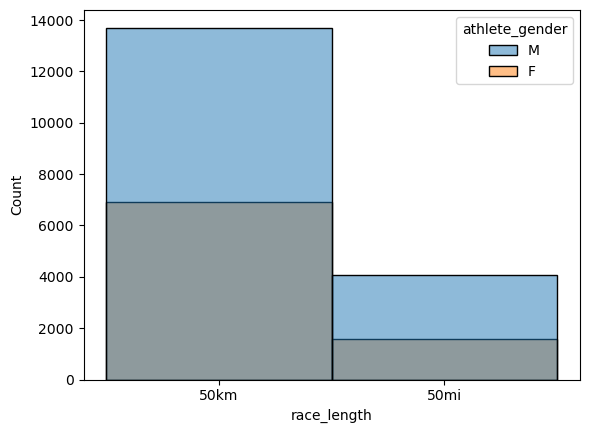

In [88]:
sns.histplot(data = df4, x = 'race_length', hue = 'athlete_gender')

<Axes: xlabel='race_length', ylabel='athlete_average_speed'>

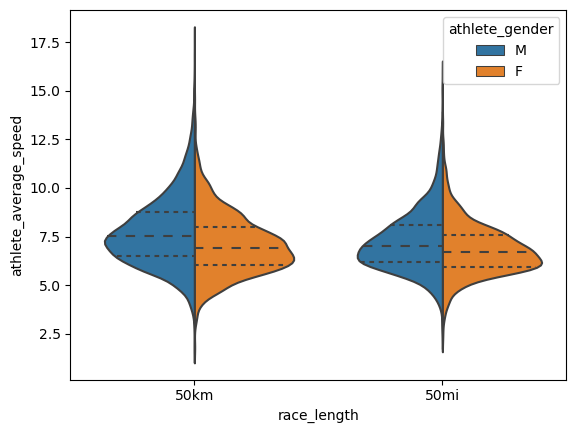

In [96]:
sns.violinplot(data = df4, x = 'race_length', y = 'athlete_average_speed', hue = 'athlete_gender', split = True, inner = 'quart')

/Users/vudung/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


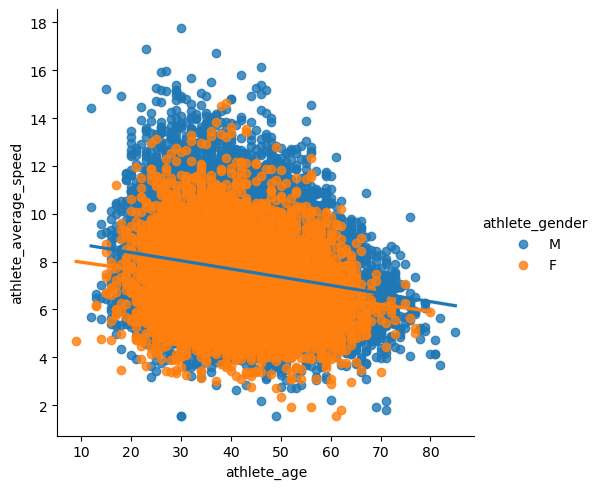

In [97]:
sns.lmplot(data = df4, x = 'athlete_age', y = 'athlete_average_speed', hue = 'athlete_gender')

In [101]:
#Difference in speed for 50km, 50mi male to female 
df4.groupby(by = ['race_length', 'athlete_gender']).agg({'athlete_average_speed': 'mean'})

athlete_average_speed
race_length athlete_gender                       
50km        F                            7.092015
            M                            7.743376
50mi        F                            6.830764
            M                            7.249766

In [ ]:
#What age group are best in 50m racev (count > 19)

In [135]:
df4.query('race_length == "50mi"').groupby(by='athlete_age').agg({'athlete_average_speed': ['mean', 'count']}).sort_values(by=('athlete_average_speed', 'mean'), ascending=False).head(15)


athlete_average_speed      
                             mean count
athlete_age                            
12.0                    10.280000     1
15.0                     8.406000     1
29.0                     7.895574   136
23.0                     7.779800    55
28.0                     7.575252   107
30.0                     7.569204   157
19.0                     7.506133    15
25.0                     7.471053    95
31.0                     7.440842   139
38.0                     7.420884   232
35.0                     7.414633   196
36.0                     7.394645   186
33.0                     7.379188   149
22.0                     7.367902    41
26.0                     7.328584    77

In [136]:
#What age group are best in 50km racev (count > 19)
df4.query('race_length == "50km"').groupby(by='athlete_age').agg({'athlete_average_speed': ['mean', 'count']}).sort_values(by=('athlete_average_speed', 'mean'), ascending=False).head(15)


athlete_average_speed      
                             mean count
athlete_age                            
12.0                    10.067000     2
20.0                     8.712523    86
15.0                     8.281222     9
22.0                     8.252475   120
21.0                     8.129901    91
26.0                     8.109766   312
19.0                     8.066386    44
23.0                     8.060486   179
27.0                     8.049621   330
24.0                     8.005956   204
32.0                     7.999102   549
29.0                     7.974724   450
28.0                     7.971808   427
25.0                     7.947700   283
30.0                     7.911649   456

Season for the data -> Slower in summer than winter?
- Spring: 3-> 5
- Summer: 6-> 8
- Fall: 9-> 11
- Winter: 12 -> 2

In [163]:
set(df4['race_day'])

{'01.01.2020',
 '01.02.2020',
 '01.03.2020',
 '01.08.2020',
 '01.11.2020',
 '02.02.2020',
 '03.10.2020',
 '04.-06.12.2020',
 '04.01.2020',
 '04.10.2020',
 '05.-06.09.2020',
 '05.-06.12.2020',
 '05.-07.09.2020',
 '05.01.2020',
 '05.07.2020',
 '05.09.2020',
 '05.12.2020',
 '06.-07.06.2020',
 '06.03.2020',
 '06.06.2020',
 '06.12.2020',
 '07.-08.11.2020',
 '07.03.2020',
 '07.11.2020',
 '08.-09.02.2020',
 '08.-09.08.2020',
 '08.02.2020',
 '08.03.2020',
 '08.08.2020',
 '08.11.2020',
 '09.05.2020',
 '09.08.2020',
 '10.-11.10.2020',
 '10.10.2020',
 '11.01.2020',
 '11.03.2020',
 '11.07.2020',
 '11.09.2020',
 '11.10.2020',
 '11.11.2020',
 '12.-13.09.2020',
 '12.01.2020',
 '12.03.2020',
 '12.07.2020',
 '12.09.2020',
 '12.12.2020',
 '13.-14.09.2020',
 '13.03.2020',
 '13.06.2020',
 '13.09.2020',
 '13.11.2020',
 '13.12.2020',
 '14.-15.11.2020',
 '14.02.2020',
 '14.03.2020',
 '14.11.2020',
 '15.-16.02.2020',
 '15.-16.08.2020',
 '15.02.2020',
 '15.03.2020',
 '15.08.2020',
 '16.02.2020',
 '16.10.2020',

In [164]:
df4['race_month'] = df4['race_day'].str.split('.').str.get(1).astype(int)

In [165]:
set(df4['race_month'] )

{-29,
 -28,
 -27,
 -26,
 -25,
 -23,
 -21,
 -20,
 -19,
 -18,
 -16,
 -15,
 -14,
 -13,
 -11,
 -9,
 -8,
 -7,
 -6,
 1,
 2,
 3,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12}